In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))
import jReversion as jR
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import networkx as nx
from statannot import add_stat_annotation
import robustness as rb
import concurrent.futures

In [2]:
# networkModel =['bortezomib',
#                 # 'igvh',
#                 'apoptosis',
#                 # 'aurora',
#                 'bt474_long',
#                 #'bt474_short',
#                 # 'cd4t',
#                 'colitis',
#                 'death',
#                 # 'egfr',
#                 # 'erbb',
#                 # 'fa_brca',
#                 # 'fa_check',
#                 'hcc1954_long',
#                 #'hcc1954_short',
#                 'hgf',
#                 'mammalian',
#                 # 'mammalian_2006',
#                 'mapk',
#                 'oxidative',
#                 # 'pro_inflammatory',
#                 #'fibroblasts',
#                 'skbr3_long',
#                 #'skbr3_short',
#                 'tlgl_2008',
#                 'tlgl_2011',
#                 # 'tlgl_2011_reduced',
#                 # 'prostate',
#                 'migration']

In [3]:
networkModel =['bortezomib',
                # 'igvh',
                'apoptosis',
                # 'aurora',
                'bt474_long',
                'bt474_short',
                # 'cd4t',
                'colitis',
                'death',
                # 'egfr',
                # 'erbb',
                # 'fa_brca',
                # 'fa_check',
                'hcc1954_long',
                'hcc1954_short',
                'hgf',
                'mammalian',
                # 'mammalian_2006',
                'mapk',
                'oxidative',
                # 'pro_inflammatory',
                'fibroblasts',
                'skbr3_long',
                'skbr3_short',
                'tlgl_2008',
                'tlgl_2011',
                # 'tlgl_2011_reduced',
                # 'prostate',
                'migration']

In [4]:
# robustness_CC = dict()
# with concurrent.futures.ProcessPoolExecutor(max_workers=14) as executor:
#     futures = {executor.submit(rb.par_robustness_primary_attractor_perturbation, model=M, directory='../', state_num=2**15): M for M in networkModel}

# for future in concurrent.futures.as_completed(futures):
#     Model = futures[future]
#     temp = future.result()
#     robustness_CC[Model] = temp['robustness'] 

In [5]:
# data = pd.DataFrame(columns=['network', 'robustness'])
# for model in networkModel:
#     data = data.append({'network': model, 'robustness': robustness_CC[model]}, ignore_index=True)        

In [6]:
# data.to_csv('../data/robustness_perturbation_cellCollective_2_15.csv')

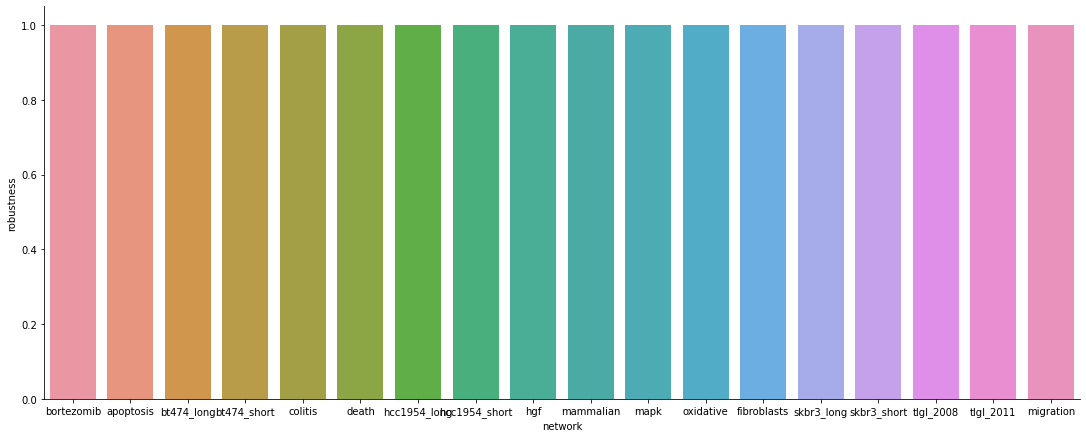

In [7]:
# g = sns.catplot(x='network', y='robustness', data=data, kind='bar', height=6, aspect=2.5)

In [13]:
sampling_num = 20

In [ ]:
robustness_CC = dict()
with concurrent.futures.ProcessPoolExecutor(max_workers=14) as executor:
    futures = {executor.submit(rb.par_robustness_initial_perturbation, model=M, directory='../', state_num=2**sampling_num): M for M in networkModel}

for future in concurrent.futures.as_completed(futures):
    Model = futures[future]
    temp = future.result()
    robustness_CC[Model] = temp['robustness'] 

data = pd.DataFrame(columns=['network', 'robustness'])
for model in networkModel:
    data = data.append({'network': model, 'robustness': robustness_CC[model]}, ignore_index=True)

In [ ]:
g = sns.catplot(x='network', y='robustness', data=data, kind='bar', height=6, aspect=2.5)

In [ ]:
data.to_csv('../data/robustness_initial_perturbation_cellCollective_2_'+ str(sampling_num) + '.csv')